In [1]:
from imports import *

In [2]:
file_path = '/data/vidales/opana_tree_combined_v2609.root'
file = uproot.open(file_path)
optree = file['opanatree']['OpAnaTree'] # Tree con número de fotoelectrones
print("Keys in optree:", optree.keys())

Keys in optree: ['eventID', 'runID', 'subrunID', 'nuvX', 'nuvY', 'nuvZ', 'nuvT', 'nuvE', 'stepX', 'stepY', 'stepZ', 'stepT', 'dE', 'energydep', 'energydepX', 'energydepY', 'energydepZ', 'E', 'StartPx', 'StartPy', 'StartPz', 'EndPx', 'EndPy', 'EndPz', 'process', 'trackID', 'motherID', 'PDGcode', 'InTimeCosmics', 'InTimeCosmicsTime', 'dEtpc', 'dEpromx', 'dEpromy', 'dEpromz', 'dEspreadx', 'dEspready', 'dEspreadz', 'dElowedges', 'dEmaxedges', 'nopflash', 'flash_id', 'flash_time', 'flash_total_pe', 'flash_pe_v', 'flash_tpc', 'flash_y', 'flash_yerr', 'flash_z', 'flash_zerr', 'flash_x', 'flash_xerr', 'flash_ophit_time', 'flash_ophit_risetime', 'flash_ophit_starttime', 'flash_ophit_amp', 'flash_ophit_area', 'flash_ophit_width', 'flash_ophit_pe', 'flash_ophit_ch']


In [3]:
# Load variables to be predicted and associated data in a single step
hit_nuvT, hit_PE, hit_ch, hit_t = (optree[key].array() for key in ['nuvT', 'flash_ophit_pe', 'flash_ophit_ch', 'flash_ophit_time'])


# Filter out subarrays with more than one neutrino interaction
hit_nuvT_filtered, hit_PE_filtered, hit_ch_filtered, hit_t_filtered = zip(*[
    (subarray_nuvT, subarray_PE, subarray_ch, subarray_t) 
    for subarray_nuvT, subarray_PE, subarray_ch, subarray_t in zip(hit_nuvT, hit_PE, hit_ch, hit_t)
    if len(subarray_nuvT) ==1
])

Flash time distribution chosed is from [0us,2us] in opana_tree_combined_v2609 and opana_tree_combined_v2609_2. There's a peak in 10us. It probably require make another data set.

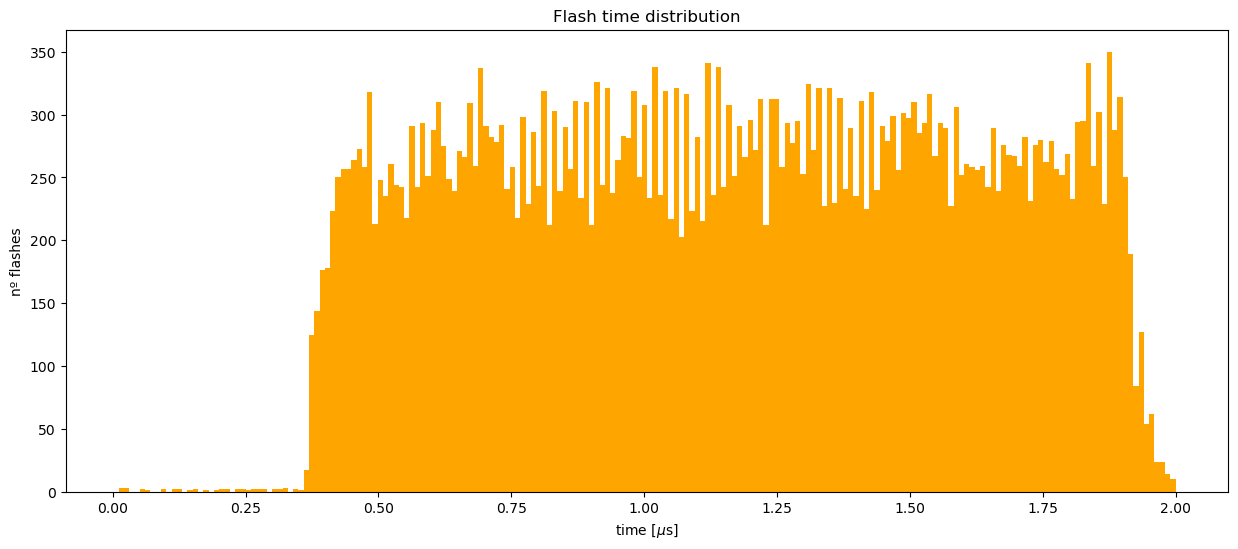

In [3]:
flash_time_flattened = ak.flatten(optree['flash_time'].array(), axis=None)
plot_flash_time_distribution(flash_time_flattened,bins=200)

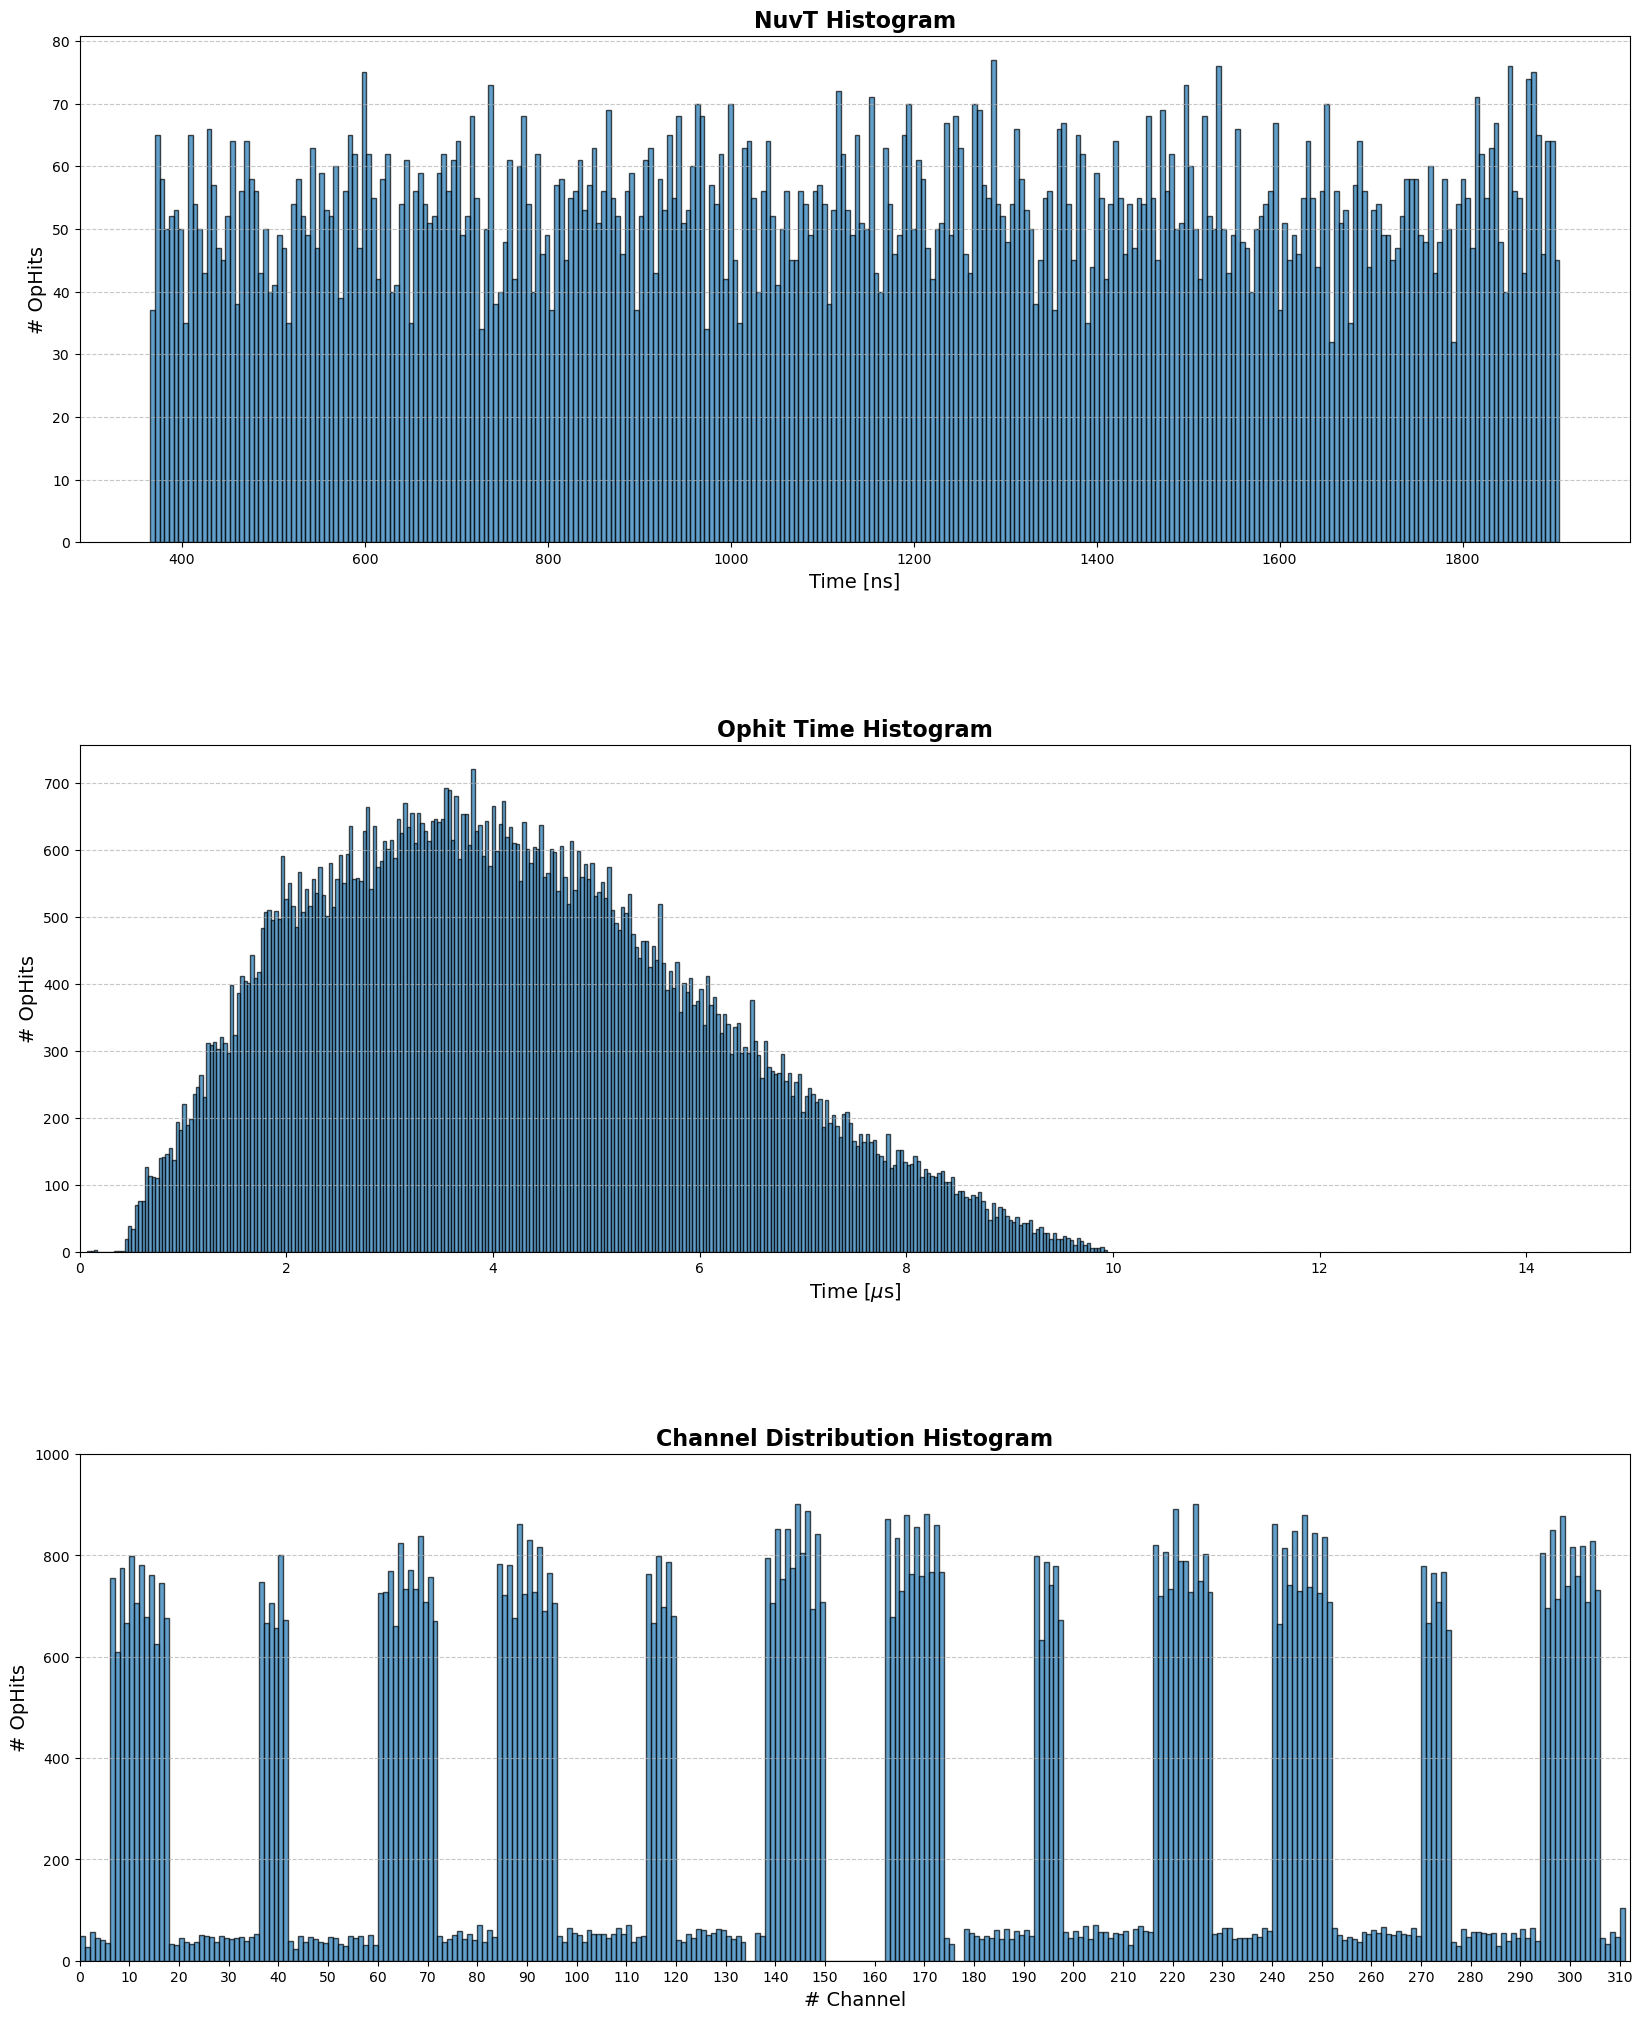

In [4]:
plot_variable_histograms(hit_nuvT, hit_t, hit_ch)

In [3]:
fotoelectrones = np.loadtxt('saved_archives/fotoelectrones_tiempos/fotoelectrones.csv', delimiter=",")
tiempos = np.loadtxt('saved_archives/fotoelectrones_tiempos/tiempos.csv', delimiter=",")

In [8]:
fotoelectrones_sums = np.sum(fotoelectrones, axis=0)
tiempos_sums = np.sum(tiempos, axis=0)

In [5]:
fotoelectrones_promedio = np.mean(fotoelectrones, axis=0)
tiempos_promedio = np.mean(tiempos, axis=0)

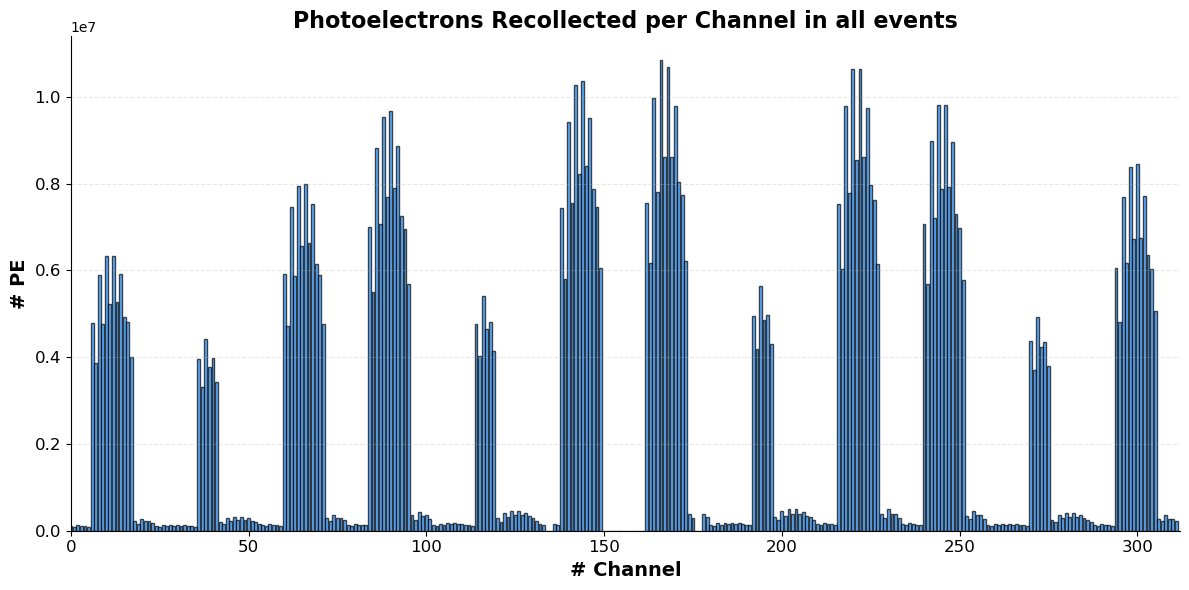

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Bar plot with transparency, gradient, and a modern color palette
plt.bar(range(len(fotoelectrones_sums)), fotoelectrones_sums, 
        color='dodgerblue', edgecolor='black', alpha=0.7)

# Axis labels and title with improved font size and weight
plt.xlabel('# Channel', fontsize=14, weight='bold')
plt.ylabel('# PE', fontsize=14, weight='bold')
plt.title('Photoelectrons Recollected per Channel in all events', fontsize=16, weight='bold')

# Customize the x and y axis
plt.xlim(0, 312)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the grid and spines
plt.grid(axis='y', alpha=0.3, linestyle='--')  # Light gridlines
plt.gca().spines['top'].set_visible(False)  # Hide top border
plt.gca().spines['right'].set_visible(False)  # Hide right border

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

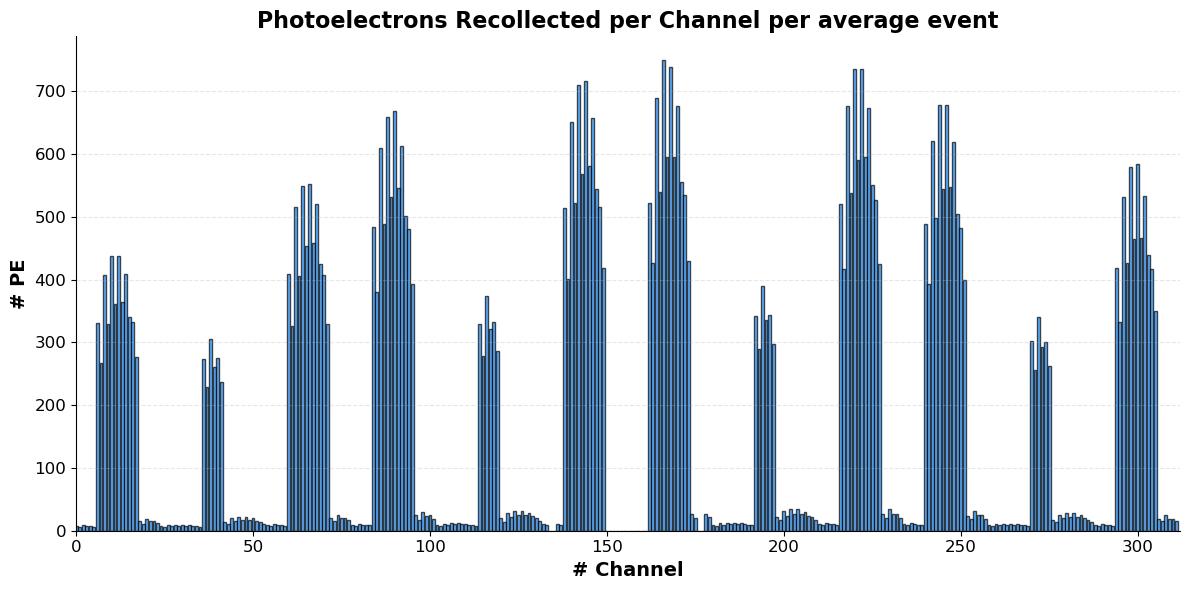

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Bar plot with transparency, gradient, and a modern color palette
plt.bar(range(len(fotoelectrones_promedio)), fotoelectrones_promedio, 
        color='dodgerblue', edgecolor='black', alpha=0.7)

# Axis labels and title with improved font size and weight
plt.xlabel('# Channel', fontsize=14, weight='bold')
plt.ylabel('# PE', fontsize=14, weight='bold')
plt.title('Photoelectrons Recollected per Channel per average event', fontsize=16, weight='bold')

# Customize the x and y axis
plt.xlim(0, 312)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the grid and spines
plt.grid(axis='y', alpha=0.3, linestyle='--')  # Light gridlines
plt.gca().spines['top'].set_visible(False)  # Hide top border
plt.gca().spines['right'].set_visible(False)  # Hide right border

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

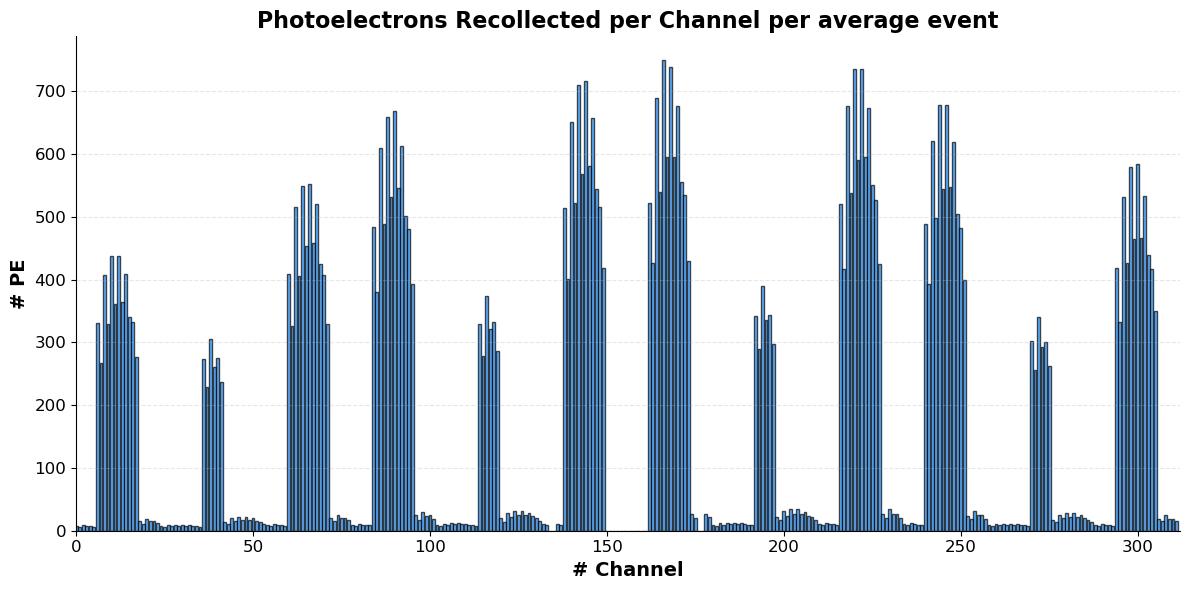

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Bar plot with transparency, gradient, and a modern color palette
plt.bar(range(len(fotoelectrones_promedio)), fotoelectrones_promedio, 
        color='dodgerblue', edgecolor='black', alpha=0.7)

# Axis labels and title with improved font size and weight
plt.xlabel('# Channel', fontsize=14, weight='bold')
plt.ylabel('# PE', fontsize=14, weight='bold')
plt.title('Photoelectrons Recollected per Channel per average event', fontsize=16, weight='bold')

# Customize the x and y axis
plt.xlim(0, 312)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the grid and spines
plt.grid(axis='y', alpha=0.3, linestyle='--')  # Light gridlines
plt.gca().spines['top'].set_visible(False)  # Hide top border
plt.gca().spines['right'].set_visible(False)  # Hide right border

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

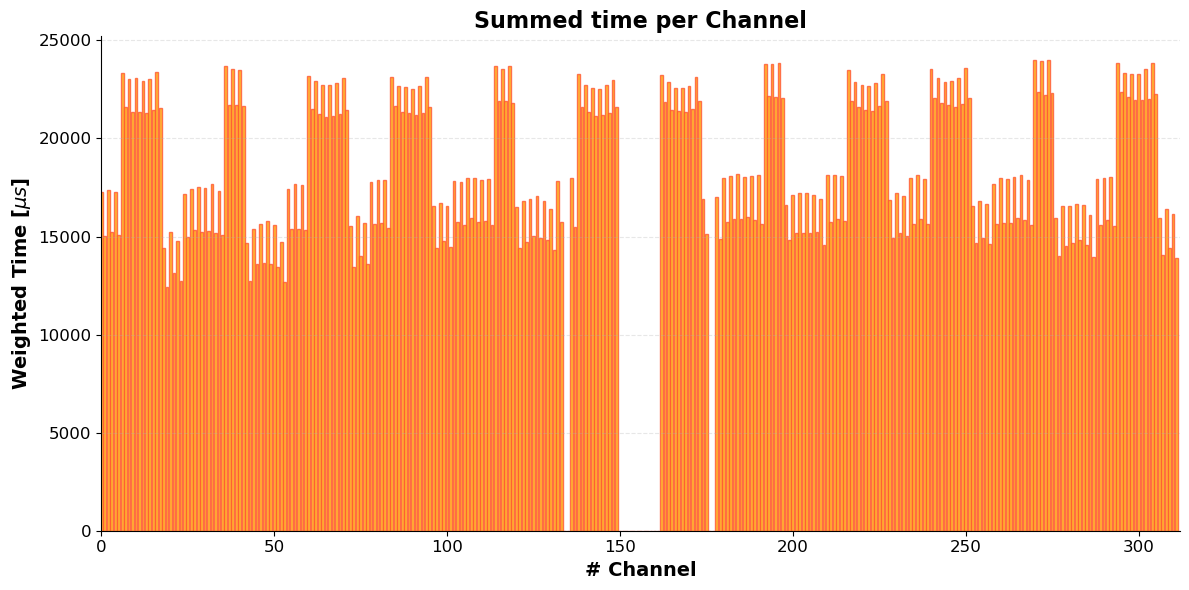

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Bar plot with transparency, gradient, and a modern color palette
plt.bar(range(len(tiempos_sums)), tiempos_sums, 
        color='orange', edgecolor='#FF5733', alpha=0.8)  # Adjusting transparency

# Axis labels with improved font size and weight
plt.xlabel('# Channel', fontsize=14, weight='bold')
plt.ylabel(r'Weighted Time [$\mu s$]', fontsize=14, weight='bold')
plt.title('Summed time per Channel', fontsize=16, weight='bold')

# Customize the x and y axis
plt.xlim(0, 312)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the grid and spines
plt.grid(axis='y', alpha=0.3, linestyle='--')  # Light dashed gridlines on the y-axis
plt.gca().spines['top'].set_visible(False)  # Hide the top border
plt.gca().spines['right'].set_visible(False)  # Hide the right border

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


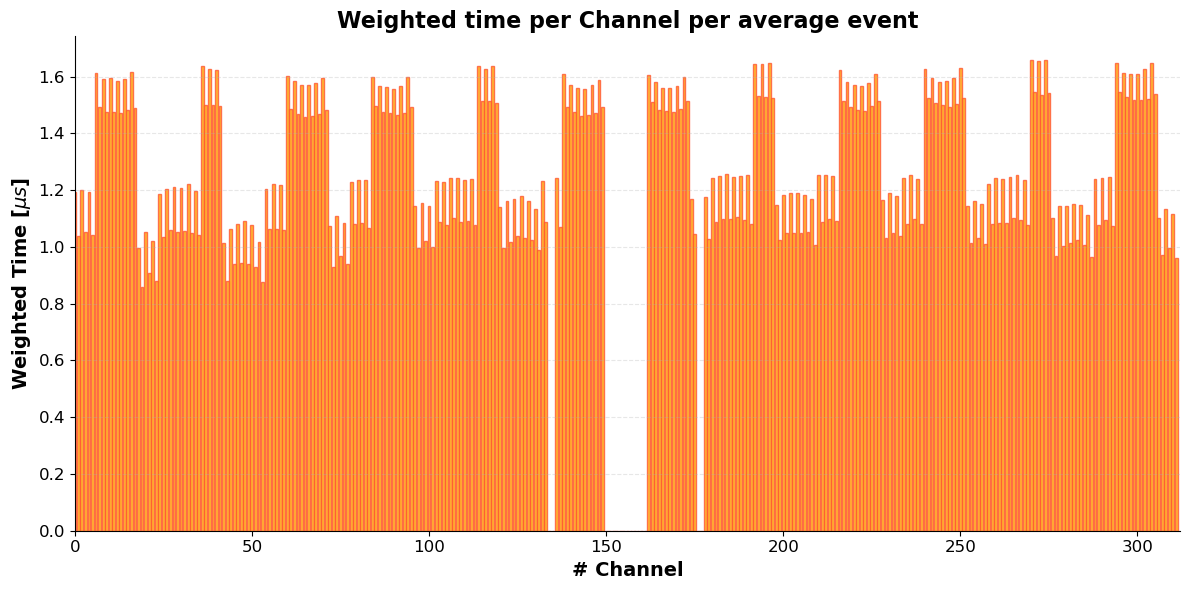

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Bar plot with transparency, gradient, and a modern color palette
plt.bar(range(len(tiempos_promedio)), tiempos_promedio, 
        color='orange', edgecolor='#FF5733', alpha=0.8)  # Adjusting transparency

# Axis labels with improved font size and weight
plt.xlabel('# Channel', fontsize=14, weight='bold')
plt.ylabel(r'Weighted Time [$\mu s$]', fontsize=14, weight='bold')
plt.title('Weighted time per Channel per average event', fontsize=16, weight='bold')

# Customize the x and y axis
plt.xlim(0, 312)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the grid and spines
plt.grid(axis='y', alpha=0.3, linestyle='--')  # Light dashed gridlines on the y-axis
plt.gca().spines['top'].set_visible(False)  # Hide the top border
plt.gca().spines['right'].set_visible(False)  # Hide the right border

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [84]:
# Flatten the data
num_events, num_channels = fotoelectrones.shape
pe_values = fotoelectrones.flatten()  # All PE values
weightedt_values = tiempos.flatten()
channel_indices = np.tile(np.arange(num_channels), num_events)  # y-axis

In [77]:
total_elements = fotoelectrones.size

# Step 2: Count the number of zeros in the matrix
num_zeros = np.count_nonzero(fotoelectrones == 0)

# Step 3: Calculate the percentage of zeros
percentage_zeros = (num_zeros / total_elements) * 100

print(f'Percentage of zeros in the matrix: {percentage_zeros:.2f}%')

Percentage of zeros in the matrix: 42.59%


In [113]:
# Step 2: Create a boolean mask for values <= 95th percentile

percentile_95 = np.percentile(pe_values, 95)
#mask = (pe_values !=0) & (pe_values <= percentile_95)

# Step 3: Filter the vectors
filtered_pe_values = pe_values[mask]
filtered_channel_indices = channel_indices[mask]
filtered_weightedt_values=weightedt_values[mask]

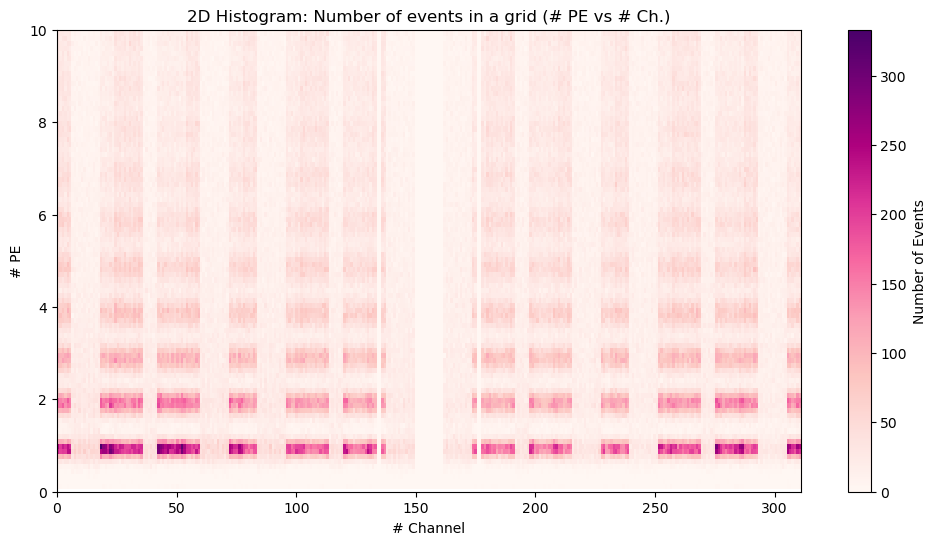

In [98]:
# Create the 2D histogram
plt.figure(figsize=(12, 6))
plt.hist2d(filtered_channel_indices, filtered_pe_values, bins=[312,10000], cmap='RdPu')

# Add color bar and labels
plt.colorbar(label='Number of Events')
plt.xlabel('# Channel')
plt.ylabel('# PE')
plt.title('2D Histogram: Number of events in a grid (# PE vs # Ch.)')

plt.ylim(0,10)

# Show the plot
plt.show()

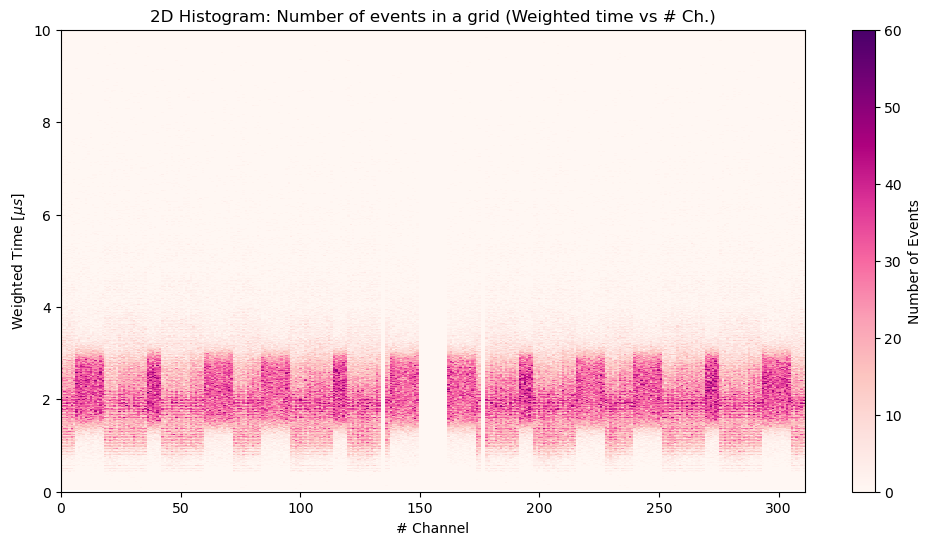

In [121]:
# Create the 2D histogram
plt.figure(figsize=(12, 6))
plt.hist2d(filtered_channel_indices, filtered_weightedt_values, bins=[312, 2000], cmap='RdPu')

# Add color bar and labels
plt.colorbar(label='Number of Events')
plt.xlabel('# Channel')
plt.ylabel(r'Weighted Time [$\mu s$]')
plt.title('2D Histogram: Number of events in a grid (Weighted time vs # Ch.)')
plt.ylim(0,10)

# Show the plot
plt.show()

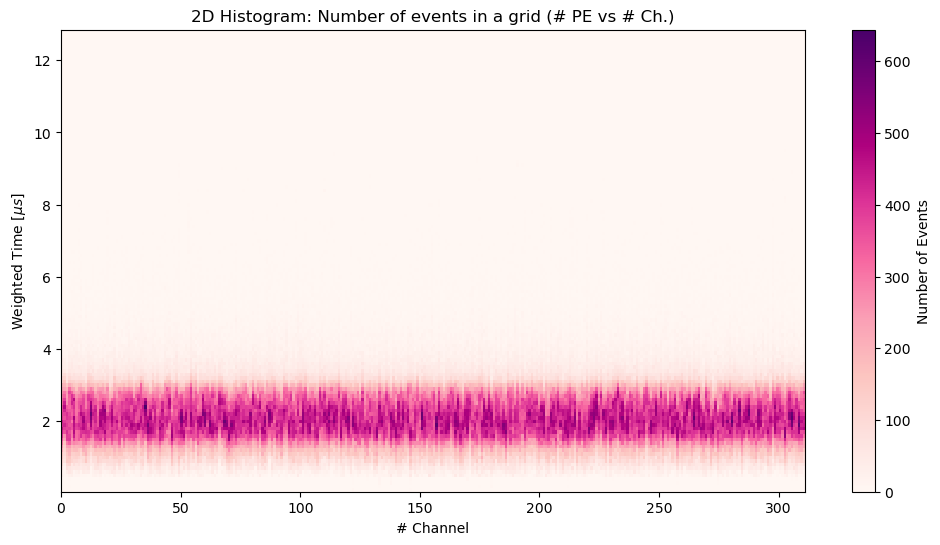

In [49]:
# Create the 2D histogram
plt.figure(figsize=(12, 6))
plt.hist2d(filtered_channel_indices, filtered_weightedt_values, bins=[312, int(np.max(filtered_weightedt_values)*10)], cmap='RdPu')

# Add color bar and labels
plt.colorbar(label='Number of Events')
plt.xlabel('# Channel')
plt.ylabel(r'Weighted Time [$\mu s$]')
plt.title('2D Histogram: Number of events in a grid (# PE vs # Ch.)')
#plt.ylim(0,10)

# Show the plot
plt.show()